Global Power Plant Database


Problem Statement:


Description:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. 
It will be continuously updated as data becomes available.

Fuel Type Aggregation:
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv("IND.csv")

In [6]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Dropping the columns which doesnt contain data

In [9]:
hp1=df.drop("other_fuel1",axis=1)
hp2=hp1.drop("other_fuel2",axis=1)
hp3=hp2.drop("other_fuel3",axis=1)
hp4=hp3.drop("owner",axis=1)
hp5=hp4.drop("wepp_id",axis=1)
hp6=hp5.drop("generation_gwh_2013",axis=1)
hp7=hp6.drop("generation_gwh_2019",axis=1)
hp8=hp7.drop("estimated_generation_gwh",axis=1)
hp9=hp8.drop("generation_data_source",axis=1)
hp10=hp9.drop("year_of_capacity_data",axis=1)
hp11=hp10.drop("country",axis=1)
hp12=hp11.drop("country_long",axis=1)
hp13=hp12.drop("name",axis=1)
hp14=hp13.drop("source",axis=1)
hp15=hp14.drop("url",axis=1)
hp16=hp15.drop("commissioning_year",axis=1)
hp17=hp16.drop("gppd_idnr",axis=1)  
hp=hp17.drop("geolocation_source",axis=1)

In [10]:
hp.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [11]:
hp.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

Removing Null Values

In [12]:
hp['latitude']=hp['latitude'].replace('',np.nan)

In [13]:
hp['latitude']=hp['latitude'].fillna(np.mean(hp["latitude"]))

In [14]:
hp['longitude']=hp['longitude'].replace('',np.nan)

In [15]:
hp['longitude']=hp['longitude'].fillna(np.mean(hp["longitude"]))

In [16]:
hp['generation_gwh_2014']=hp['generation_gwh_2014'].replace('',np.nan)

In [17]:
hp['generation_gwh_2014']=hp['generation_gwh_2014'].fillna(np.mean(hp["generation_gwh_2014"]))

In [18]:
hp['generation_gwh_2015']=hp['generation_gwh_2015'].replace('',np.nan)

In [19]:
hp['generation_gwh_2015']=hp['generation_gwh_2015'].fillna(np.mean(hp["generation_gwh_2015"]))

In [20]:
hp['generation_gwh_2016']=hp['generation_gwh_2016'].replace('',np.nan)

In [21]:
hp['generation_gwh_2016']=hp['generation_gwh_2016'].fillna(np.mean(hp["generation_gwh_2016"]))

In [22]:
hp['generation_gwh_2017']=hp['generation_gwh_2017'].replace('',np.nan)

In [23]:
hp['generation_gwh_2017']=hp['generation_gwh_2017'].fillna(np.mean(hp["generation_gwh_2017"]))

In [24]:
hp['generation_gwh_2018']=hp['generation_gwh_2018'].replace('',np.nan)

In [25]:
hp['generation_gwh_2018']=hp['generation_gwh_2018'].fillna(np.mean(hp["generation_gwh_2018"]))

In [26]:
hp.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [27]:
hp

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


we need to encode it so that it can be easy to classifyas there are 8 types of fuel.


In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
for i in hp.columns:
    if hp[i].dtypes=="object":
        hp[i]=enc.fit_transform(hp[i].values.reshape(-1,1))

In [30]:
hp

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [31]:
hp.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,-0.010204,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,-0.347948,0.011472,0.018818,0.039209,0.039675,0.037780
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.124769,-0.124828,-0.131051,-0.132003,-0.136983
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,-0.136983,0.884956,0.923461,0.957159,0.982689,1.000000


In [32]:
hp.corr()['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
latitude              -0.010204
generation_gwh_2014   -0.124769
generation_gwh_2015   -0.124828
generation_gwh_2016   -0.131051
generation_gwh_2017   -0.132003
generation_gwh_2018   -0.136983
longitude             -0.347948
capacity_mw           -0.380395
Name: primary_fuel, dtype: float64

Here,the capacity of a power plant is negatively correlated with the type of fuel, longitutde and the generation_gwh


<AxesSubplot:>

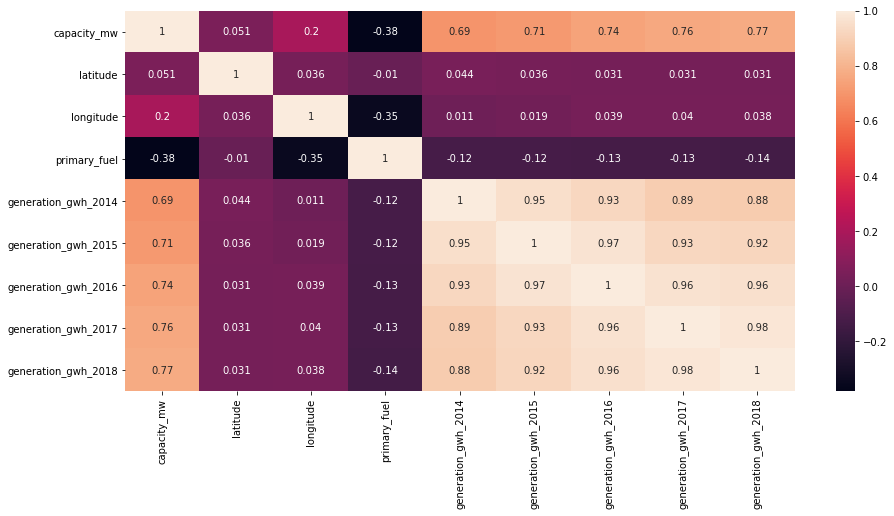

In [33]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(hp.corr(),annot=True)

In [34]:
hp.describe()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


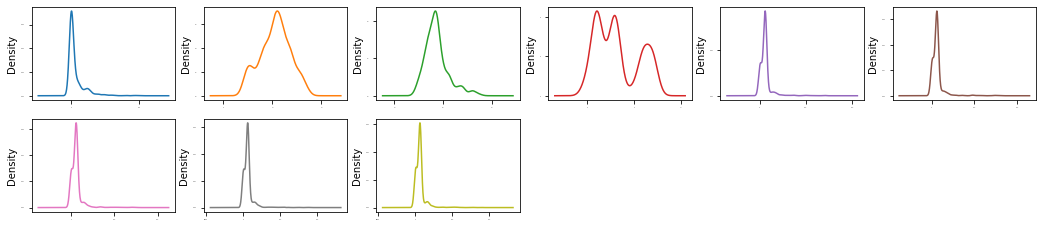

In [35]:
hp.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show()

In [36]:
x=hp.drop("primary_fuel",axis=1)
y=hp["primary_fuel"]

In [37]:
x.skew().sort_values(ascending=False)

generation_gwh_2015    5.364134
generation_gwh_2017    5.110952
generation_gwh_2016    5.068427
generation_gwh_2014    5.035446
generation_gwh_2018    4.937907
capacity_mw            3.123576
longitude              1.141881
latitude              -0.149698
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [39]:
type(x_new)

numpy.ndarray

In [40]:
x=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,1.159436,-0.952545,0.287071,0.311796,0.315787,0.312925,0.321938
1,0.193694,0.579032,-0.544976,0.287071,0.311796,0.315787,0.312925,0.321938
2,-0.292337,0.099912,-2.379864,0.287071,0.311796,0.315787,0.312925,0.321938
3,0.360998,0.428491,2.174468,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
4,1.649503,0.109302,1.117231,0.537628,1.385476,1.427655,1.180690,1.552482
...,...,...,...,...,...,...,...,...
902,1.593509,-0.817376,0.153591,0.287071,-2.251373,-1.270233,-0.581036,-0.716996
903,-1.615576,-1.357110,0.332870,0.287071,0.311796,0.315787,0.312925,0.321938
904,-0.522773,-0.980536,-0.280819,0.287071,0.311796,0.315787,0.312925,0.321938
905,0.086915,0.508938,-0.796374,0.287071,0.311796,0.315787,0.312925,0.321938


In [42]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.123226
generation_gwh_2015    0.074583
generation_gwh_2016    0.041821
capacity_mw            0.022164
generation_gwh_2017    0.018337
longitude              0.002926
generation_gwh_2018    0.000783
latitude              -0.074269
dtype: float64

In [43]:
sk=x.skew()

In [44]:
sk[np.abs(sk)>0.25].all()

True

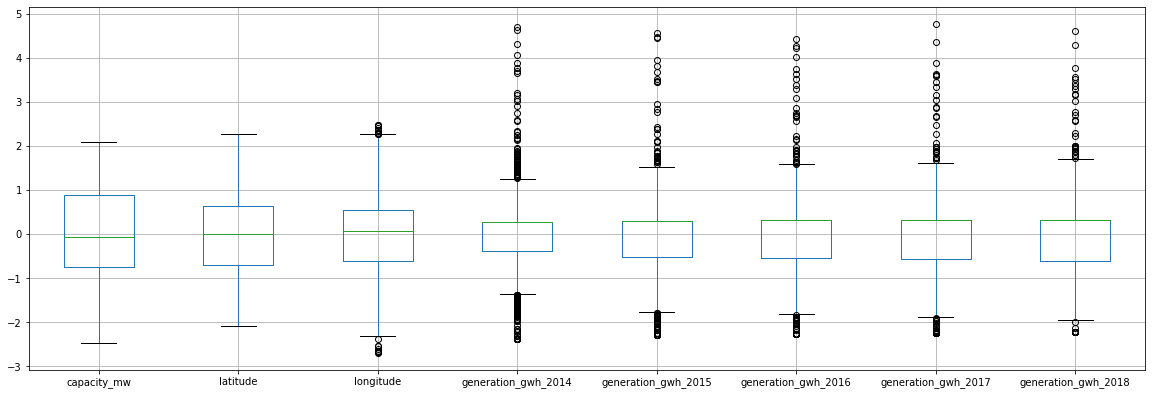

In [45]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

 There are outliers Hence, removing the outliers

In [46]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [47]:
new_hp=pd.concat([x,y],axis=1)
new_hp

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
0,-1.695767,1.159436,-0.952545,0.287071,0.311796,0.315787,0.312925,0.321938,6.0
1,0.193694,0.579032,-0.544976,0.287071,0.311796,0.315787,0.312925,0.321938,1.0
2,-0.292337,0.099912,-2.379864,0.287071,0.311796,0.315787,0.312925,0.321938,7.0
3,0.360998,0.428491,2.174468,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699,2.0
4,1.649503,0.109302,1.117231,0.537628,1.385476,1.427655,1.180690,1.552482,1.0
...,...,...,...,...,...,...,...,...,...
902,1.593509,-0.817376,0.153591,0.287071,-2.251373,-1.270233,-0.581036,-0.716996,1.0
903,-1.615576,-1.357110,0.332870,0.287071,0.311796,0.315787,0.312925,0.321938,6.0
904,-0.522773,-0.980536,-0.280819,0.287071,0.311796,0.315787,0.312925,0.321938,7.0
905,0.086915,0.508938,-0.796374,0.287071,0.311796,0.315787,0.312925,0.321938,1.0


In [48]:
from scipy.stats import zscore
z=np.abs(zscore(new_hp))
new_hp=new_hp[(z<3).all(axis=1)]

In [49]:
x=new_hp.drop("primary_fuel",axis=1)
y=new_hp["primary_fuel"]

In [50]:
x

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,1.159436,-0.952545,0.287071,0.311796,0.315787,0.312925,0.321938
1,0.193694,0.579032,-0.544976,0.287071,0.311796,0.315787,0.312925,0.321938
2,-0.292337,0.099912,-2.379864,0.287071,0.311796,0.315787,0.312925,0.321938
3,0.360998,0.428491,2.174468,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
4,1.649503,0.109302,1.117231,0.537628,1.385476,1.427655,1.180690,1.552482
...,...,...,...,...,...,...,...,...
902,1.593509,-0.817376,0.153591,0.287071,-2.251373,-1.270233,-0.581036,-0.716996
903,-1.615576,-1.357110,0.332870,0.287071,0.311796,0.315787,0.312925,0.321938
904,-0.522773,-0.980536,-0.280819,0.287071,0.311796,0.315787,0.312925,0.321938
905,0.086915,0.508938,-0.796374,0.287071,0.311796,0.315787,0.312925,0.321938


In [51]:
y

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 894, dtype: float64

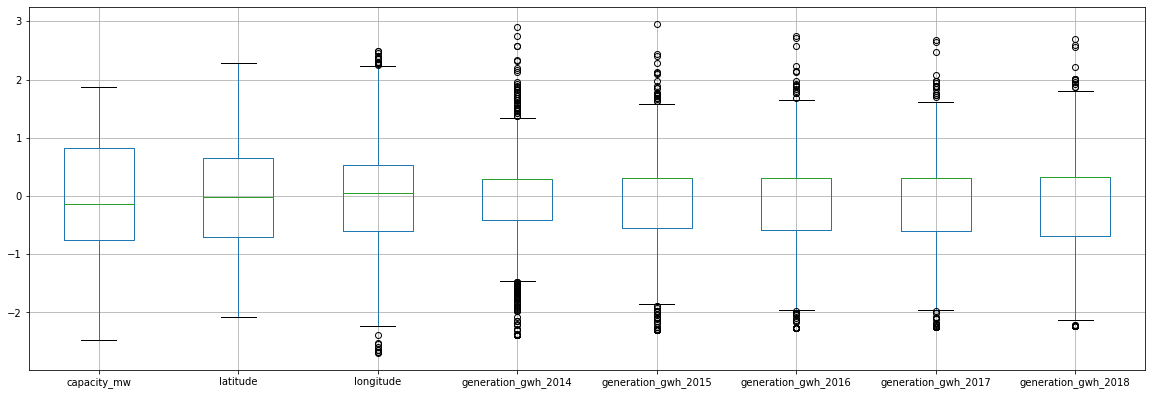

In [52]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

 The outliers are removed

Predicting Primary Fuel

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [54]:
maxAcc=0
maxRS=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.6703910614525139 on Random state 219


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=219)

In [56]:
x_train

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
812,0.942591,0.294307,-1.161346,0.410932,0.208157,0.337263,0.256157,0.302463
314,0.204292,-0.980489,-0.568243,-1.053720,-1.136611,-1.262307,-1.185685,-0.803139
788,1.785229,0.132317,1.276003,0.237316,0.900778,0.999822,1.403573,1.427235
69,0.717371,-0.082152,0.517954,0.287071,0.311796,0.315787,0.312925,0.321938
277,0.848676,0.059092,1.343711,0.287071,-1.976007,-2.270977,-2.245602,-2.225536
...,...,...,...,...,...,...,...,...
33,-1.374565,1.018731,-1.470796,0.287071,0.311796,0.315787,0.312925,0.321938
724,1.699382,0.467465,1.163779,2.904914,2.962227,2.756059,2.651802,2.560845
755,-0.533394,-0.035628,-0.617959,0.287071,0.311796,0.315787,0.312925,0.321938
774,-1.259322,-0.017171,0.178195,0.287071,0.311796,0.315787,0.312925,0.321938


In [57]:
y_train

812    1.0
314    3.0
788    1.0
69     1.0
277    1.0
      ... 
33     6.0
724    1.0
755    6.0
774    7.0
452    5.0
Name: primary_fuel, Length: 715, dtype: float64

In [58]:
x_test

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
690,0.299659,1.689620,0.400481,-0.945796,-2.296677,-1.361599,-0.924748,-0.809652
718,-0.281531,0.640314,-0.202690,0.287071,0.311796,0.315787,0.312925,0.321938
127,-1.374565,0.394540,-1.511418,0.287071,0.311796,0.315787,0.312925,0.321938
3,0.360998,0.428491,2.174468,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
182,-0.533394,-0.558171,1.023757,0.287071,0.311796,0.315787,0.312925,0.321938
...,...,...,...,...,...,...,...,...
374,-0.925168,-1.661242,0.092284,0.287071,0.311796,0.315787,0.312925,0.321938
712,-0.709396,-0.017171,0.178195,0.287071,0.311796,0.315787,0.312925,0.321938
65,0.770823,1.718440,0.349084,-0.350651,-0.257808,-0.236758,-0.267592,-0.299788
473,1.455704,-1.967918,0.326843,-0.686372,0.343488,0.685011,0.693355,0.459574


In [59]:
y_test

690    3.0
718    1.0
127    6.0
3      2.0
182    3.0
      ... 
374    7.0
712    3.0
65     3.0
473    1.0
639    3.0
Name: primary_fuel, Length: 179, dtype: float64

In [60]:
x_train.shape

(715, 8)

In [61]:
y_train.shape

(715,)

In [62]:
x_test.shape

(179, 8)

In [63]:
y_test.shape

(179,)

Logistic Regression

In [64]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 67.0391061452514
[[ 0  0  0  1  0  0  0  3]
 [ 0 34  0  5  0  0  2  2]
 [ 0  3  3  7  0  0  0  1]
 [ 0  6  0 36  0  0  4  3]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  2]
 [ 0  3  0  3  0  0 27  2]
 [ 0  0  0  1  0  0  6 19]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.69      0.79      0.74        43
         2.0       1.00      0.21      0.35        14
         3.0       0.65      0.73      0.69        49
         4.0       0.00      0.00      0.00         3
         5.0       1.00      0.20      0.33         5
         6.0       0.69      0.77      0.73        35
         7.0       0.59      0.73      0.66        26

    accuracy                           0.67       179
   macro avg       0.58      0.43      0.44       179
weighted avg       0.67      0.67      0.64       179



Decision Tree Clasifier

In [65]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 70.94972067039106
[[ 2  1  0  1  0  0  0  0]
 [ 2 38  1  1  0  0  0  1]
 [ 0  2  8  1  1  1  1  0]
 [ 0  5  5 37  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 1  2  0  2  0  0 27  3]
 [ 0  2  0  2  0  0  9 13]]
              precision    recall  f1-score   support

         0.0       0.40      0.50      0.44         4
         1.0       0.70      0.88      0.78        43
         2.0       0.50      0.57      0.53        14
         3.0       0.84      0.76      0.80        49
         4.0       0.00      0.00      0.00         3
         5.0       0.67      0.40      0.50         5
         6.0       0.73      0.77      0.75        35
         7.0       0.68      0.50      0.58        26

    accuracy                           0.71       179
   macro avg       0.57      0.55      0.55       179
weighted avg       0.71      0.71      0.70       179



Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 77.09497206703911
[[ 3  0  0  1  0  0  0  0]
 [ 2 38  0  1  0  0  1  1]
 [ 0  2  4  7  0  1  0  0]
 [ 2  2  0 43  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  3  0  0 29  3]
 [ 3  0  0  3  0  0  1 19]]
              precision    recall  f1-score   support

         0.0       0.30      0.75      0.43         4
         1.0       0.83      0.88      0.85        43
         2.0       0.67      0.29      0.40        14
         3.0       0.74      0.88      0.80        49
         4.0       0.00      0.00      0.00         3
         5.0       0.67      0.40      0.50         5
         6.0       0.94      0.83      0.88        35
         7.0       0.76      0.73      0.75        26

    accuracy                           0.77       179
   macro avg       0.61      0.59      0.58       179
weighted avg       0.77      0.77      0.76       179



Support Vector Classifier

In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 69.27374301675978
[[ 0  0  0  1  0  0  0  3]
 [ 0 37  0  2  0  0  0  4]
 [ 0  2  3  8  0  0  0  1]
 [ 0  5  0 41  0  0  0  3]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  2]
 [ 0  3  0  2  0  0 24  6]
 [ 0  1  0  3  0  0  3 19]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.71      0.86      0.78        43
         2.0       0.75      0.21      0.33        14
         3.0       0.71      0.84      0.77        49
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         5
         6.0       0.89      0.69      0.77        35
         7.0       0.50      0.73      0.59        26

    accuracy                           0.69       179
   macro avg       0.44      0.42      0.41       179
weighted avg       0.67      0.69      0.66       179



Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.5503107149582576


In [69]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.7337329734479944


In [70]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.6431548553135397


In [71]:
scr4=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of Support Vector Classifier is",scr4.mean())

Cross validation score of Support Vector Classifier is 0.6118259996233759


Random Forest Classifier shows 78.21% and cross validation score shows 72% 

Hyper Paramter Testing

In [72]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

In [73]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 46, 'max_features': 'log2'}

In [74]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7988826815642458

In [75]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'min_samples_leaf':range(1,50,3),
            'min_samples_split':range(2,50,3),
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy'],
           'splitter':['best','random']}

In [76]:
RCV=GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'gini',
 'max_depth': 37,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [77]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.7486033519553073

The Accuracy is 78.21% after using Random Forest Classifier.
Cross Validation score is 72%

To Predict the capacity_mw

In [78]:
hp

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


Seperating the dependent and independent variable

In [79]:
x=hp.drop("capacity_mw",axis=1)
y=hp["capacity_mw"]

In [80]:
x.skew().sort_values(ascending=False)

generation_gwh_2015    5.364134
generation_gwh_2017    5.110952
generation_gwh_2016    5.068427
generation_gwh_2014    5.035446
generation_gwh_2018    4.937907
longitude              1.141881
primary_fuel           0.472251
latitude              -0.149698
dtype: float64

Bringing the skewness in between (-0.5,0.5)

In [81]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [82]:
type(x_new)

numpy.ndarray

In [83]:
x=pd.DataFrame(x_new,columns=x.columns)

In [84]:
x

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.159436,-0.952545,1.171313,0.287071,0.311796,0.315787,0.312925,0.321938
1,0.579032,-0.544976,-0.996291,0.287071,0.311796,0.315787,0.312925,0.321938
2,0.099912,-2.379864,1.441576,0.287071,0.311796,0.315787,0.312925,0.321938
3,0.428491,2.174468,-0.362170,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
4,0.109302,1.117231,-0.996291,0.537628,1.385476,1.427655,1.180690,1.552482
...,...,...,...,...,...,...,...,...
902,-0.817376,0.153591,-0.996291,0.287071,-2.251373,-1.270233,-0.581036,-0.716996
903,-1.357110,0.332870,1.171313,0.287071,0.311796,0.315787,0.312925,0.321938
904,-0.980536,-0.280819,1.441576,0.287071,0.311796,0.315787,0.312925,0.321938
905,0.508938,-0.796374,-0.996291,0.287071,0.311796,0.315787,0.312925,0.321938


In [85]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.123226
generation_gwh_2015    0.074583
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
longitude              0.002926
generation_gwh_2018    0.000783
primary_fuel          -0.047067
latitude              -0.074269
dtype: float64

In [86]:
sk=x.skew()

In [87]:
sk[np.abs(sk)>0.25].all()

True

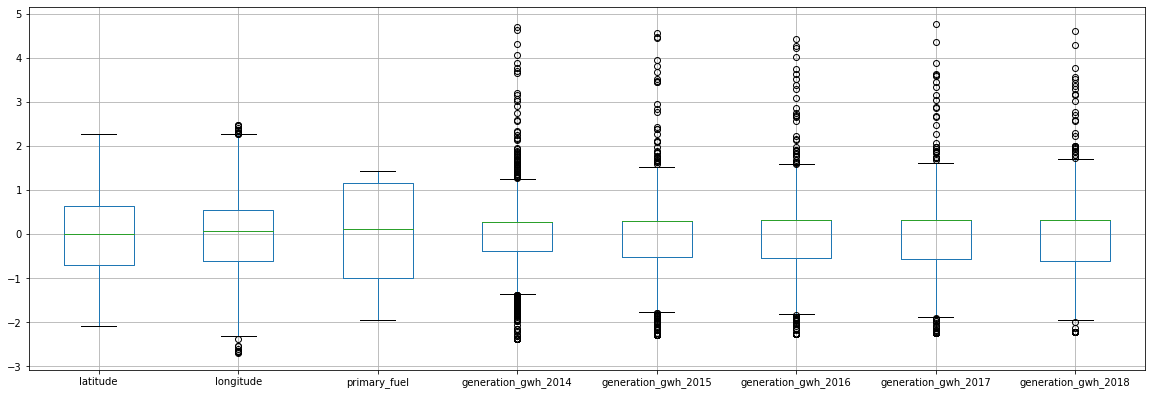

In [88]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [89]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [90]:
new_hp=pd.concat([x,y],axis=1)
new_hp

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw
0,1.159436,-0.952545,1.171313,0.287071,0.311796,0.315787,0.312925,0.321938,2.5
1,0.579032,-0.544976,-0.996291,0.287071,0.311796,0.315787,0.312925,0.321938,98.0
2,0.099912,-2.379864,1.441576,0.287071,0.311796,0.315787,0.312925,0.321938,39.2
3,0.428491,2.174468,-0.362170,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699,135.0
4,0.109302,1.117231,-0.996291,0.537628,1.385476,1.427655,1.180690,1.552482,1800.0
...,...,...,...,...,...,...,...,...,...
902,-0.817376,0.153591,-0.996291,0.287071,-2.251373,-1.270233,-0.581036,-0.716996,1600.0
903,-1.357110,0.332870,1.171313,0.287071,0.311796,0.315787,0.312925,0.321938,3.0
904,-0.980536,-0.280819,1.441576,0.287071,0.311796,0.315787,0.312925,0.321938,25.5
905,0.508938,-0.796374,-0.996291,0.287071,0.311796,0.315787,0.312925,0.321938,80.0


In [91]:
from scipy.stats import zscore
z=np.abs(zscore(new_hp))
new_hp=new_hp[(z<3).all(axis=1)]

In [92]:
x=new_hp.drop("capacity_mw",axis=1)
y=new_hp["capacity_mw"]

In [93]:
x

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.159436,-0.952545,1.171313,0.287071,0.311796,0.315787,0.312925,0.321938
1,0.579032,-0.544976,-0.996291,0.287071,0.311796,0.315787,0.312925,0.321938
2,0.099912,-2.379864,1.441576,0.287071,0.311796,0.315787,0.312925,0.321938
3,0.428491,2.174468,-0.362170,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
4,0.109302,1.117231,-0.996291,0.537628,1.385476,1.427655,1.180690,1.552482
...,...,...,...,...,...,...,...,...
902,-0.817376,0.153591,-0.996291,0.287071,-2.251373,-1.270233,-0.581036,-0.716996
903,-1.357110,0.332870,1.171313,0.287071,0.311796,0.315787,0.312925,0.321938
904,-0.980536,-0.280819,1.441576,0.287071,0.311796,0.315787,0.312925,0.321938
905,0.508938,-0.796374,-0.996291,0.287071,0.311796,0.315787,0.312925,0.321938


In [94]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 886, dtype: float64

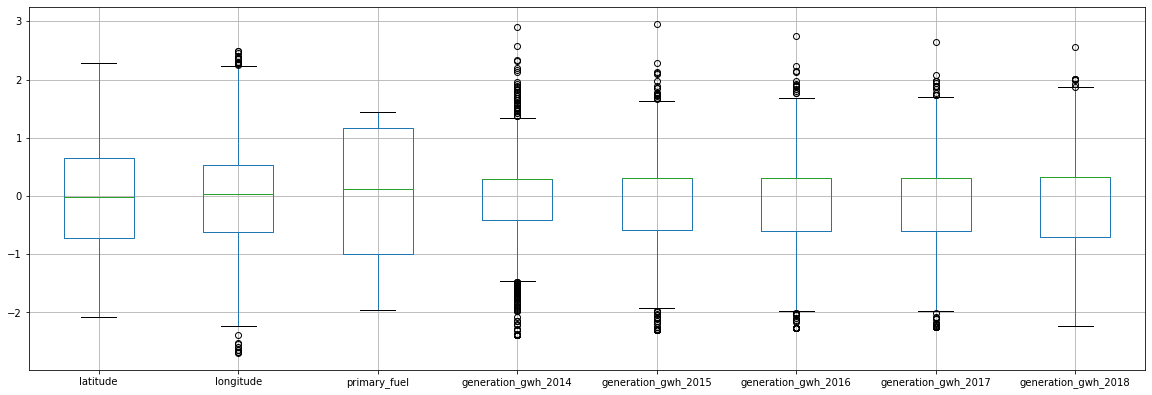

In [95]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

The outliers are removed 

Using linear regression

In [96]:
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score

In [97]:
for i in range (0,900) :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}") 
    print("\n")

at random state 0,the training accuracy is :0.2520115319809949
at random state 0,the testing accuracy is :0.3015985907862343


at random state 1,the training accuracy is :0.28137151620306056
at random state 1,the testing accuracy is :0.20277493166167349


at random state 2,the training accuracy is :0.26004556164630344
at random state 2,the testing accuracy is :0.29918333795756236


at random state 3,the training accuracy is :0.26135212706331645
at random state 3,the testing accuracy is :0.28728049613462847


at random state 4,the training accuracy is :0.2464895518495539
at random state 4,the testing accuracy is :0.3199399041919474


at random state 5,the training accuracy is :0.2590714033471493
at random state 5,the testing accuracy is :0.29965663735374914


at random state 6,the training accuracy is :0.24906588943348207
at random state 6,the testing accuracy is :0.301633585792909


at random state 7,the training accuracy is :0.24593272445968106
at random state 7,the testing accuracy i

at random state 69,the training accuracy is :0.2698724569202059
at random state 69,the testing accuracy is :0.2463835243137229


at random state 70,the training accuracy is :0.2612408412111036
at random state 70,the testing accuracy is :0.25441398701961593


at random state 71,the training accuracy is :0.2811248462105951
at random state 71,the testing accuracy is :0.18133236965100574


at random state 72,the training accuracy is :0.2678249193820348
at random state 72,the testing accuracy is :0.25412850757959293


at random state 73,the training accuracy is :0.2762857776581553
at random state 73,the testing accuracy is :0.21277613391015526


at random state 74,the training accuracy is :0.2780665376020862
at random state 74,the testing accuracy is :0.21588554594352927


at random state 75,the training accuracy is :0.3019543543914891
at random state 75,the testing accuracy is :0.083095255126172


at random state 76,the training accuracy is :0.29562108835315004
at random state 76,the testi

at random state 146,the training accuracy is :0.28866730512548844
at random state 146,the testing accuracy is :0.1808047839400012


at random state 147,the training accuracy is :0.2601235738748239
at random state 147,the testing accuracy is :0.26366149441451037


at random state 148,the training accuracy is :0.28284322347894575
at random state 148,the testing accuracy is :0.14500359453268885


at random state 149,the training accuracy is :0.2525303267400102
at random state 149,the testing accuracy is :0.2856345146125844


at random state 150,the training accuracy is :0.24961064039240466
at random state 150,the testing accuracy is :0.32979362230347287


at random state 151,the training accuracy is :0.2901558116883407
at random state 151,the testing accuracy is :0.17199840011827539


at random state 152,the training accuracy is :0.29668758247311067
at random state 152,the testing accuracy is :0.14369615807500813


at random state 153,the training accuracy is :0.3041823111562013
at random

at random state 224,the training accuracy is :0.2634516291277792
at random state 224,the testing accuracy is :0.27895974415428804


at random state 225,the training accuracy is :0.21942959808059193
at random state 225,the testing accuracy is :0.36951453419738844


at random state 226,the training accuracy is :0.26773496739863867
at random state 226,the testing accuracy is :0.2515769102770795


at random state 227,the training accuracy is :0.2791620967174335
at random state 227,the testing accuracy is :0.19725048863973216


at random state 228,the training accuracy is :0.29598819880007254
at random state 228,the testing accuracy is :0.07280729301345501


at random state 229,the training accuracy is :0.26885616608114327
at random state 229,the testing accuracy is :0.25669302649874326


at random state 230,the training accuracy is :0.2688319081895353
at random state 230,the testing accuracy is :0.26074591787566703


at random state 231,the training accuracy is :0.2573618590760457
at rando

at random state 302,the training accuracy is :0.2603523193390518
at random state 302,the testing accuracy is :0.26611958130184


at random state 303,the training accuracy is :0.28198838177316354
at random state 303,the testing accuracy is :0.21232490120301795


at random state 304,the training accuracy is :0.2856414527913238
at random state 304,the testing accuracy is :0.18193848731308426


at random state 305,the training accuracy is :0.26477391624790847
at random state 305,the testing accuracy is :0.28241755299299576


at random state 306,the training accuracy is :0.2752142900348371
at random state 306,the testing accuracy is :0.23157169796119814


at random state 307,the training accuracy is :0.25194669609402087
at random state 307,the testing accuracy is :0.28229634756979083


at random state 308,the training accuracy is :0.2579118556962553
at random state 308,the testing accuracy is :0.2762922804128235


at random state 309,the training accuracy is :0.2625179426237638
at random st

at random state 366,the training accuracy is :0.2767068001687817
at random state 366,the testing accuracy is :0.20590325270607268


at random state 367,the training accuracy is :0.27543196561445693
at random state 367,the testing accuracy is :0.23906265975968444


at random state 368,the training accuracy is :0.2386558008613885
at random state 368,the testing accuracy is :0.3439150976462486


at random state 369,the training accuracy is :0.30453805778661935
at random state 369,the testing accuracy is :0.09767792815690868


at random state 370,the training accuracy is :0.24554525888500456
at random state 370,the testing accuracy is :0.3454264497399615


at random state 371,the training accuracy is :0.25993684219495716
at random state 371,the testing accuracy is :0.3008588095344076


at random state 372,the training accuracy is :0.2826820430038356
at random state 372,the testing accuracy is :0.19744921326230702


at random state 373,the training accuracy is :0.2683546908374238
at random 

at random state 430,the training accuracy is :0.2639293289399772
at random state 430,the testing accuracy is :0.24362079245348678


at random state 431,the training accuracy is :0.26850587092669864
at random state 431,the testing accuracy is :0.26523442176400647


at random state 432,the training accuracy is :0.2735126436028045
at random state 432,the testing accuracy is :0.23569063081524322


at random state 433,the training accuracy is :0.24457639525147168
at random state 433,the testing accuracy is :0.3562507285485462


at random state 434,the training accuracy is :0.31048888337935365
at random state 434,the testing accuracy is :0.08865773880938266


at random state 435,the training accuracy is :0.28721781432308824
at random state 435,the testing accuracy is :0.1489010037449372


at random state 436,the training accuracy is :0.2587488129398139
at random state 436,the testing accuracy is :0.31475822595119085


at random state 437,the training accuracy is :0.2621047770260939
at random

at random state 507,the testing accuracy is :0.23014025181044262


at random state 508,the training accuracy is :0.27720618457597956
at random state 508,the testing accuracy is :0.19447564765099334


at random state 509,the training accuracy is :0.27022747303344363
at random state 509,the testing accuracy is :0.23359938452676743


at random state 510,the training accuracy is :0.2906000974529267
at random state 510,the testing accuracy is :0.17748827623978525


at random state 511,the training accuracy is :0.28949971172576994
at random state 511,the testing accuracy is :0.1265297357716374


at random state 512,the training accuracy is :0.28565624435444215
at random state 512,the testing accuracy is :0.17707556082826637


at random state 513,the training accuracy is :0.2681233458542436
at random state 513,the testing accuracy is :0.25173463094398163


at random state 514,the training accuracy is :0.2537960802849445
at random state 514,the testing accuracy is :0.3116123429124721


at rand

at random state 571,the training accuracy is :0.2987603381595265
at random state 571,the testing accuracy is :0.1036643580983937


at random state 572,the training accuracy is :0.3100826635986379
at random state 572,the testing accuracy is :0.06774530537965573


at random state 573,the training accuracy is :0.2856036684774783
at random state 573,the testing accuracy is :0.18241221611321523


at random state 574,the training accuracy is :0.27725345196040274
at random state 574,the testing accuracy is :0.2276166357933671


at random state 575,the training accuracy is :0.2723100841505155
at random state 575,the testing accuracy is :0.2461684396653313


at random state 576,the training accuracy is :0.2769416560137947
at random state 576,the testing accuracy is :0.22841052974294995


at random state 577,the training accuracy is :0.27177049550670707
at random state 577,the testing accuracy is :0.24312776840660066


at random state 578,the training accuracy is :0.27681285931794253
at random s


at random state 650,the training accuracy is :0.2806670073922358
at random state 650,the testing accuracy is :0.21000413818053265


at random state 651,the training accuracy is :0.2895140288479864
at random state 651,the testing accuracy is :0.18709129306694916


at random state 652,the training accuracy is :0.29045194673048047
at random state 652,the testing accuracy is :0.12195897760176111


at random state 653,the training accuracy is :0.24825819297704999
at random state 653,the testing accuracy is :0.32736646856393414


at random state 654,the training accuracy is :0.28189246316986816
at random state 654,the testing accuracy is :0.15337794475198863


at random state 655,the training accuracy is :0.27442972068468796
at random state 655,the testing accuracy is :0.2277797869430579


at random state 656,the training accuracy is :0.2761112939068393
at random state 656,the testing accuracy is :0.19373137361327852


at random state 657,the training accuracy is :0.2495136890751083
at rand

at random state 717,the training accuracy is :0.2549618549375907
at random state 717,the testing accuracy is :0.28572911807519896


at random state 718,the training accuracy is :0.25403786066663836
at random state 718,the testing accuracy is :0.27383885525151885


at random state 719,the training accuracy is :0.25486520897332987
at random state 719,the testing accuracy is :0.30648190208359505


at random state 720,the training accuracy is :0.2985929246700878
at random state 720,the testing accuracy is :0.07310943778050805


at random state 721,the training accuracy is :0.2708379964602803
at random state 721,the testing accuracy is :0.24413085570727977


at random state 722,the training accuracy is :0.27057678268581686
at random state 722,the testing accuracy is :0.2559552947294004


at random state 723,the training accuracy is :0.2759495263925409
at random state 723,the testing accuracy is :0.23766274206317117


at random state 724,the training accuracy is :0.29184946658701316
at rando

at random state 794,the training accuracy is :0.27212609690317124
at random state 794,the testing accuracy is :0.24150356567490572


at random state 795,the training accuracy is :0.2729272232852903
at random state 795,the testing accuracy is :0.23489411814136119


at random state 796,the training accuracy is :0.27303349811973343
at random state 796,the testing accuracy is :0.23526504030093742


at random state 797,the training accuracy is :0.24703974103064807
at random state 797,the testing accuracy is :0.3100730918734963


at random state 798,the training accuracy is :0.23425192872749767
at random state 798,the testing accuracy is :0.3228378534838723


at random state 799,the training accuracy is :0.27795083439353774
at random state 799,the testing accuracy is :0.16795788906403186


at random state 800,the training accuracy is :0.28681448111205243
at random state 800,the testing accuracy is :0.19529577532332976


at random state 801,the training accuracy is :0.2641365591748782
at rand

at random state 861,the training accuracy is :0.24348216544443757
at random state 861,the testing accuracy is :0.34696130467337793


at random state 862,the training accuracy is :0.25634069162816886
at random state 862,the testing accuracy is :0.29884452119876204


at random state 863,the training accuracy is :0.27777002932797523
at random state 863,the testing accuracy is :0.20873277914670862


at random state 864,the training accuracy is :0.2619308996894679
at random state 864,the testing accuracy is :0.2746277125857002


at random state 865,the training accuracy is :0.24466876912960678
at random state 865,the testing accuracy is :0.34674611274147926


at random state 866,the training accuracy is :0.2807657078692021
at random state 866,the testing accuracy is :0.20145996513175712


at random state 867,the training accuracy is :0.2675568271736122
at random state 867,the testing accuracy is :0.2573229367454567


at random state 868,the training accuracy is :0.3122491471937118
at random

The testing and training accuracy is closest 26%

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=97)

In [99]:
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
pred_test=lr.predict(x_test)

In [101]:
print(r2_score(y_test,pred_test))

0.2619538356734915


In [102]:
pred_test.shape

(178,)

In [103]:
y_test.shape

(178,)

CROSS VALIDATION

In [104]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.22765681395841836 and accuracy score for training is -0.22488987425103923and accuracy score for testing is 0.2619538356734915


At cross fold 3 the cv score is 0.20787684872153825 and accuracy score for training is -0.22488987425103923and accuracy score for testing is 0.2619538356734915


At cross fold 4 the cv score is 0.21443122359737582 and accuracy score for training is -0.22488987425103923and accuracy score for testing is 0.2619538356734915


At cross fold 5 the cv score is 0.20817397112550157 and accuracy score for training is -0.22488987425103923and accuracy score for testing is 0.2619538356734915


At cross fold 6 the cv score is 0.22292135718208064 and accuracy score for training is -0.22488987425103923and accuracy score for testing is 0.2619538356734915


At cross fold 7 the cv score is 0.20078829787058558 and accuracy score for training is -0.22488987425103923and accuracy score for testing is 0.2619538356734915


At cross fold 8 the cv score

The training accuracy is 22.4% and testing accuracy is 26% with cv=2 which shows that the model is not good as training accuracy should be greater than equal to testing accuracy.

## Plot the Data

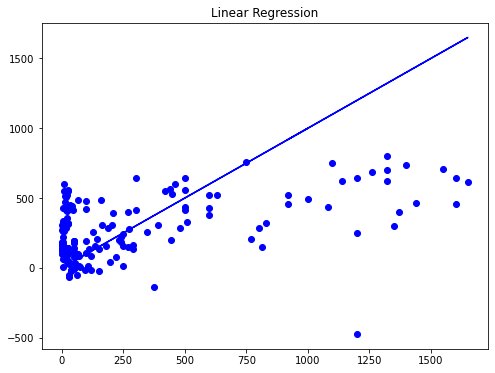

In [118]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [107]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [108]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.29412195060354973

In [109]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.2391096687005696

Since using lasso regression the accuracy is increassed from 26% to 29%

Ensemble Technique

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [111]:
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [112]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 79.74403144897384
Cross Val Score: 78.33378441812083


Random Forest Regression is providing accuracy 79% and Cross Validation Score is also around 78%.

In [113]:
import pickle

In [114]:
filename='Global_Power.pkl'
pickle.dump(ls, open(filename,'wb'))

Conclusion

In [115]:
loaded_model= pickle.load(open('Global_Power.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.29412195060354973


In [116]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
predicted,581.29854,-1.838195,301.331073,322.997412,287.857572,131.665979,505.353229,198.82549,287.93936,432.65997,...,700.379506,49.894738,262.879558,582.639918,10.167377,118.16713,221.017937,8.692578,610.047124,431.121273
original,1198.77640,38.084000,16.554700,11.028200,8.021400,29.113000,136.723000,52.28550,677.81450,100.87470,...,1359.466000,36.178000,33.957500,33.708000,45.408000,5.90900,33.929500,42.522500,1134.719000,722.530000



The model accuracy is 29% ,more data and factors to train the model. To predict the type of primary fuel the factors seems good and model accuracy is 78%